<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%BB%A4%ED%94%BC%EC%A0%84%EB%AC%B8%EC%A0%90_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EC%A2%8C%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터를 불러오자

In [1]:
#copy.right Hongjai Rhee

## 필요한 라이브러리 불러오기
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals; import pathlib; import seaborn as sns 
from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import pandas as pd;  import numpy as np
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical; from matplotlib import style

## 데이터 불러오기  
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트
dat = pd.read_csv('/content/public/coffee_seoul_pred_0.csv', encoding='cp949')
print(dat.head(10))    
#  lon=경도,  lat=위도,   sales =월매출액(만원)
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; y=np.log(dat[:,-1]); ## 월매출은 로그 스케일로 변환


Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 49 (delta 14), reused 35 (delta 8), pack-reused 0
Unpacking objects: 100% (49/49), done.
          lon        lat   sales
0  127.063878  37.510038  4800.0
1  127.020635  37.516184  4416.0
2  127.057100  37.512939  3888.0
3  127.055213  37.496615  4032.0
4  127.051440  37.518688  4800.0
5  127.041240  37.516605  5376.0
6  127.033000  37.494129  5568.0
7  127.061904  37.493344  5184.0
8  127.052705  37.513472  5568.0
9  127.101842  37.488013  5184.0


# 네트워크 구조와 학습횟수를 정하자

In [0]:
## 학습 파라미터 설정
hidden_neuron=4      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=500; BATCH=32  ## 학습횟수 

# 학습을 실행한다

Train on 1189 samples, validate on 298 samples
Epoch 1/500
 - 0s - loss: 440.8641 - mean_squared_error: 440.8641 - val_loss: 352.2522 - val_mean_squared_error: 352.2522
Epoch 2/500
 - 0s - loss: 291.1188 - mean_squared_error: 291.1188 - val_loss: 234.6313 - val_mean_squared_error: 234.6313
Epoch 3/500
 - 0s - loss: 195.4821 - mean_squared_error: 195.4821 - val_loss: 159.0963 - val_mean_squared_error: 159.0963
Epoch 4/500
 - 0s - loss: 133.0263 - mean_squared_error: 133.0263 - val_loss: 108.6534 - val_mean_squared_error: 108.6534
Epoch 5/500
 - 0s - loss: 90.5925 - mean_squared_error: 90.5925 - val_loss: 73.6967 - val_mean_squared_error: 73.6967
Epoch 6/500
 - 0s - loss: 63.1577 - mean_squared_error: 63.1577 - val_loss: 59.4731 - val_mean_squared_error: 59.4731
Epoch 7/500
 - 0s - loss: 59.0233 - mean_squared_error: 59.0233 - val_loss: 59.1400 - val_mean_squared_error: 59.1400
Epoch 8/500
 - 0s - loss: 58.6836 - mean_squared_error: 58.6836 - val_loss: 58.7910 - val_mean_squared_error: 5

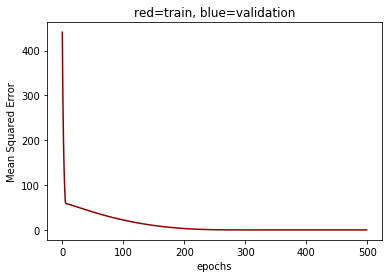

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


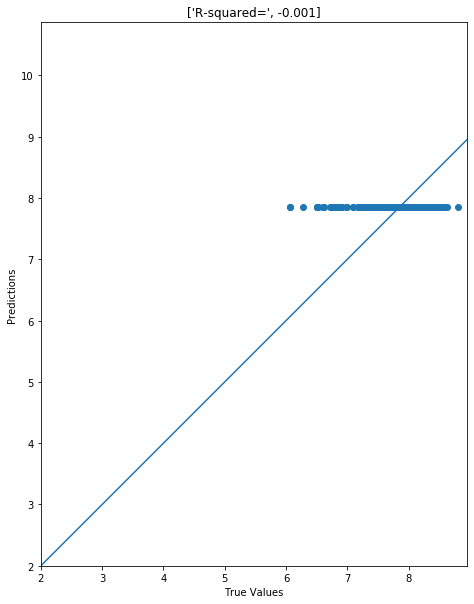

In [4]:

#### 이 아래는 자동으로 실행됨

## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(1, input_dim=x_train.shape[1]))   ## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(1)) ## 은닉층=1

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()
from sklearn.metrics import r2_score; import matplotlib.pyplot as plt


# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['mean_squared_error'], label='Training Mean Squared Error', color='darkred')
#plt.plot(range(EPOCH), hist.history['val_mean_squared_error'], label='Validation Mean Squared Error', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('Mean Squared Error'); plt.title('red=train, blue=validation'); plt.show()
model.summary()

pred_y = model.predict(x_test)
r2=r2_score(y_test, pred_y)

## 테스트 셋에 대한 예측결과 시각화
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_y);plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["R-squared=", np.round(r2,3)])
plt.xlim([2,plt.xlim()[1]]);plt.ylim([2,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()



**45도 선에 위치할수록 테스트셋에 대한 예측이 정확하게 된 것이**다
예측치는 거의 동일하게 나타나고 있다.


# 개점 예정인 새로운 커피전문점에 대한 월매출액을 예측하여 보자


In [5]:
# 6. 예측하기 
x_new= x_test[4:7]; print(np.round(x_new,2)); 
yhat = np.exp(model.predict(x_new))
print(np.round(yhat,2))
## EOF

[[127.16  37.55]
 [126.98  37.57]
 [126.8   37.57]]
[[2555.43]
 [2555.43]
 [2555.43]]



---
# 생각해보기
위치정보만으로는 매출을 예측하기 어렵다(아무리 복잡한 신경망을 설계하더라도). 어떻게 해야 할까?
